In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from openpyxl import load_workbook
import functions as f

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 1
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 9

In [2]:
#constantes
R = 8.314 #J/k.mol
H_al = 0
H_ni = 0

In [3]:
#subfunciones
#Gibbs energy of Al in gamma phase
def G_gamma_al(T):
    return -11278.378+(188.684153*T)-(31.748192*T*np.log(T))-(1.231e28*T**(-9))
#Gibbs energy of Ni in gamma phase
def G_gamma_ni(T):
    return -5179.159+(117.854*T)-(22.096*T*np.log(T))-(0.004807*T**2)
#L parameter for gamma phase
def L_al_ni_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma
    return -168750+(16*T)+(30600*(x_al_gamma-x_ni_gamma))+(41700*(x_al_gamma-x_ni_gamma)**2)
#Gibbs energy of AlNi in gamma phase
def G_ni_al_gamma_prime(T):
    return (0.75*G_gamma_ni(T))-40000+(3*T)+(0.25*G_gamma_al(T))

In [4]:
#funciones
#funcion for the Gibbs energy of the gamma phase
def G_m_gamma(T,x_al_gamma):
    x_ni_gamma = 1-x_al_gamma #molar fractions
    #Gibbs reference contribution
    G_m_ref_gamma = (x_al_gamma*(G_gamma_al(T)-H_al))+(x_ni_gamma*(G_gamma_ni(T)-H_ni))
    #Gibbs entropy contribution
    G_m_ent_gamma = R * T * (x_al_gamma * np.log(x_al_gamma) + x_ni_gamma * np.log(x_ni_gamma))
    #Gibbs excess contribution
    G_m_E_gamma = x_al_gamma*x_ni_gamma*L_al_ni_gamma(T,x_al_gamma)
    
    return G_m_ref_gamma+G_m_ent_gamma+G_m_E_gamma

#function for the Gibbs energy of the gamma prime phase
def G_m_gamma_prime(T):
    return G_ni_al_gamma_prime(T)

In [5]:
#fracciones
#values for the Al molar fraction
x_al = np.linspace(0.001, 0.999, 50)
#Temperatures in K
Temp = [500, 700, 900, 1100, 1300]

In [6]:
#Calculating the Gibbs energy for gamma and gamma prime phases
for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

In [7]:
G_gamma

array([ -66271.18746673,  -69988.59482741,  -73392.5544188 ,
        -76626.95427663,  -79718.25132339,  -82673.59240465,
        -85493.2358932 ,  -88174.40885004,  -90712.9167444 ,
        -93103.9380465 ,  -95342.46247237,  -97423.55267681,
        -99342.51015763, -101094.98545346, -102677.05411041,
       -104085.27064417, -105316.70781182, -106368.9857508 ,
       -107240.29392375, -107929.40781833, -108435.7017251 ,
       -108759.15850794, -108900.37700635, -108860.57751824,
       -108641.60567487, -108245.93491764, -107676.66770556,
       -106937.53551536, -106032.89763381, -104967.73868112,
       -103747.66473584, -102378.89785219, -100868.26865766,
        -99223.20658269,  -97451.72708271,  -95562.41493836,
        -93564.40231064,  -91467.33960192,  -89281.35618419,
        -87017.00643689,  -84685.19378029,  -82297.06047765,
        -79863.82173104,  -77396.50398831,  -74905.50669831,
        -72399.80771812,  -69885.35359302,  -67361.20239552,
        -64807.10212121,

In [8]:
G_gamma_prime

-101119.77200499325

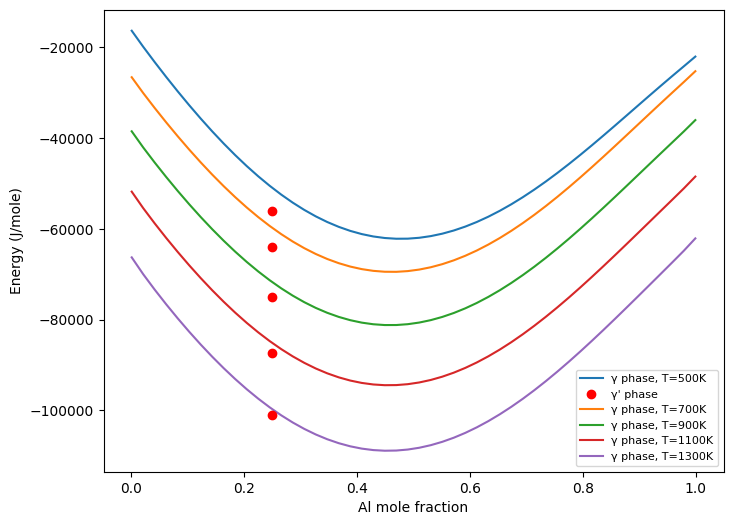

In [9]:
#Plotting the gamma and gamma prime phases
plt.figure(figsize=(8,6))
for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)

    #plt.plot(x_al,G_gamma)
    plt.plot(x_al,G_gamma, label=f'γ phase, T={T}K')
    plt.plot(0.25, G_gamma_prime, 'ro', markersize=6, label=f"γ' phase" if T == Temp[0] else "")
    
    plt.xlabel('Al mole fraction')
    plt.ylabel('Energy (J/mole)')
    plt.legend(loc='lower right', fontsize=8)
plt.savefig('gamma_plot.jpg')

T=500K: Boundary at x_Al = 0.4083
T=700K: Boundary at x_Al = 0.3880
T=900K: Boundary at x_Al = 0.3676
T=1100K: Boundary at x_Al = 0.3472
T=1300K: Boundary at x_Al = 0.3269


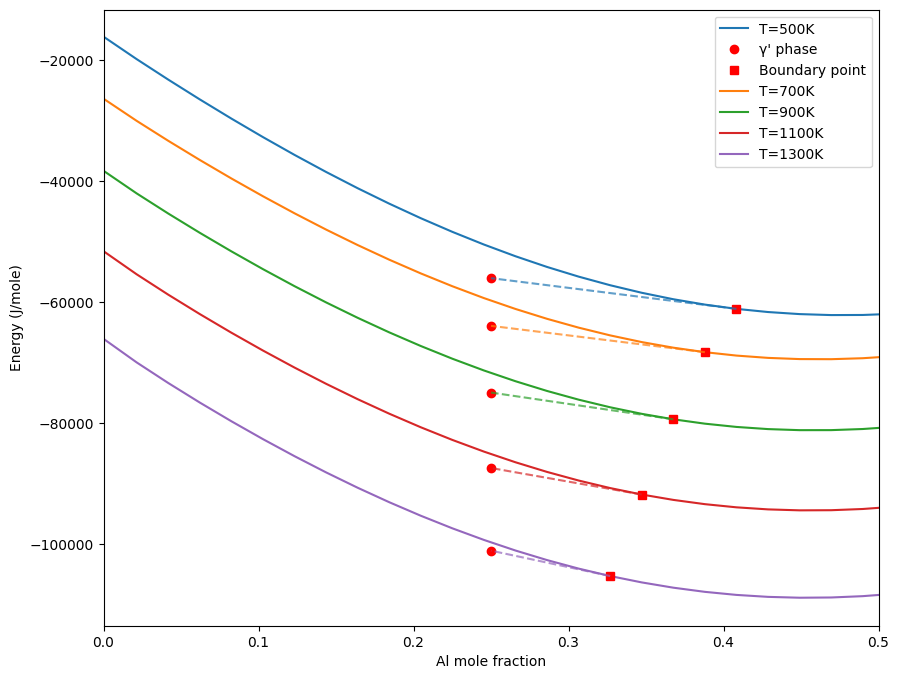

In [10]:
#finding the gamma/(gamma+gammaa') -> this would be a tangent between the gamma and gamma'
plt.figure(figsize=(10, 8))

for T in Temp:
    G_gamma = G_m_gamma(T, x_al)
    G_gamma_prime = G_m_gamma_prime(T)
    
    #need the Al-rich side for the gamma/(gamma+gamma') boundary
    compositions = x_al > 0.25 #array with true for compositions higher 0.25 and false
    x_al_right = x_al[compositions] #keep the compositions that are higher than 0.25
    G_gamma_right = G_gamma[compositions] #Gibbs eneregies for compositions higher than 0.25
    
    #calculating the slope for the gamma/(gamma+gamma')
    slopes = (G_gamma_prime - G_gamma_right) / (0.25 - x_al_right) #calculating the slope for the line that connects to the gamma' point
    dG_dx = np.gradient(G_gamma_right, x_al_right) #dervative of the gamma curve at each point
    diff = np.abs(dG_dx - slopes) #difference bewteen the derivative and the slope
    min_idx = np.argmin(diff) #find the minimum of the difference
    
    #finding the compositions and energy at the boundary point and the phase boundary composition
    x_boundary = x_al_right[min_idx]
    G_boundary = G_gamma_right[min_idx]
    
    #plotting the results
    line = plt.plot(x_al, G_gamma, label=f'T={T}K')[0] #plotting the Gibbs energy of the gamma phase
    plt.plot(0.25, G_gamma_prime, 'ro', markersize=6, label=f"γ' phase" if T == Temp[0] else "")  # plotting the gamma' points 
    plt.plot(x_boundary, G_boundary, 'rs', markersize=6, label=f"Boundary point" if T == Temp[0] else "") #plotting the boundary points
    plt.plot([x_boundary, 0.25], [G_boundary, G_gamma_prime], '--', color=line.get_color(), alpha=0.7) #plotting common tangent line
    
    print(f"T={T}K: Boundary at x_Al = {x_boundary:.4f}")

plt.xlabel('Al mole fraction')
plt.ylabel('Energy (J/mole)')
plt.legend()
plt.xlim(0, 0.5)
plt.savefig('boundary_plot.jpg')

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 2
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 3

In [11]:
#constants and initial values
wavelength = 1.5418 #in angstrom
twotheta_gamma_prime = np.array([24.73, 35.32, 43.66, 50.83, 57.40, 63.51, 74.81, 80.30, 85.63, 90.94, 96.25, 101.60, 107.10, 118.61])
twotheta_gamma = np.array([43.68, 50.84, 74.85, 90.97, 96.30, 118.68])

In [12]:
#calculating d
#grad to rad
def find_a(two_theta):
    #calculating theta in rad
    theta = np.radians(two_theta/2)
    #calculating d
    d = wavelength/(2*np.sin(theta))
    #setting a range for the values of lattice parameter, a, for testing
    a_test = np.linspace(3.50, 3.65, 1001) #this values are to have a range that covers tipycal lattice parameter vallues
    
    #calculating the error for the test values of a
    total_error = []
    for a in a_test:
        N_calc = (a/d)**2
        #difference of each value from the nearest integer
        error = np.sum((N_calc - np.round(N_calc))**2)
        total_error.append(error)
    
    #determining the best a value with the min error
    best_a_indx = np.argmin(total_error) #indice del min valor de a
    a_optim = a_test[best_a_indx] #valor de a optimo para el siguiente calculo

    #with the best a value, now we calculate N and find the a value for this N
    N = np.round((a_optim/d)**2).astype(int)
    a_new = d*np.sqrt(N) #nuevo valor para a para cada pico
    a = np.mean(a_new) #promedio de a de todos los picos

    #creating a dictionary with the hkl corresponding to N
    hkl_dict = {
        1: '100', 2: '110', 3: '111', 4: '200', 5: '210',
        6: '211', 8: '220', 9: '221', 10: '310', 11: '311',
        12: '222', 13: '320', 14: '321', 16: '400'
    }
    #extracting the hkl depending on the value of N obtained
    hkl = [hkl_dict.get(n, f'({n})') for n in N]
    
    #creating a dataframe to show the information
    results_df = pd.DataFrame({
        '2θ (deg)': two_theta,
        'd (Å)': d,
        'N': N,
        'hkl': hkl,
        'a (Å)': a,
        '1/d': 1/d
    })

    return a, results_df

In [13]:
#a value for gamma prime
#find_a(twotheta_gamma_prime)[1]
find_a(twotheta_gamma_prime)

(3.5892408596975325,
     2θ (deg)     d (Å)   N  hkl     a (Å)       1/d
 0      24.73  3.600004   1  100  3.589241  0.277777
 1      35.32  2.541139   2  110  3.589241  0.393524
 2      43.66  2.073126   3  111  3.589241  0.482363
 3      50.83  1.796251   4  200  3.589241  0.556715
 4      57.40  1.605294   5  210  3.589241  0.622939
 5      63.51  1.464787   6  211  3.589241  0.682693
 6      74.81  1.269086   8  220  3.589241  0.787969
 7      80.30  1.195581   9  221  3.589241  0.836413
 8      85.63  1.134288  10  310  3.589241  0.881610
 9      90.94  1.081383  11  311  3.589241  0.924742
 10     96.25  1.035317  12  222  3.589241  0.965888
 11    101.60  0.994781  13  320  3.589241  1.005246
 12    107.10  0.958383  14  321  3.589241  1.043424
 13    118.61  0.896503  16  400  3.589241  1.115445)

In [14]:
#a value for gamma
find_a(twotheta_gamma)

(3.587381560268294,
    2θ (deg)     d (Å)   N  hkl     a (Å)       1/d
 0     43.68  2.072223   3  111  3.587382  0.482574
 1     50.84  1.795921   4  200  3.587382  0.556817
 2     74.85  1.268507   8  220  3.587382  0.788328
 3     90.97  1.081105  11  311  3.587382  0.924980
 4     96.30  1.034912  12  222  3.587382  0.966265
 5    118.68  0.896178  16  400  3.587382  1.115850)

In [15]:
#gamma_prime = find_a(twotheta_gamma_prime)[1]
#gamma_prime["1/d"] = 1/gamma_prime["d (Å)"]
#gamma_prime

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 3
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 1

In [16]:
'''Problem 1'''
#parameter
R = np.linspace(0.1,1,1000) # set the values that R can take

In [17]:
#radial stress
sigma_radial_R = (5/15)*((101/100)-(1/(100*R**2))-R**2)
sigma_hoop_R = (5/15)*((101/100)-(1/(100*R**2))-((3/5)*R**2))

In [18]:
#finding the maximum values
max_radial = np.max(sigma_radial_R)
index_max_radial = R[np.argmax(sigma_radial_R)]
max_hoop = np.max(sigma_hoop_R)
index_max_hoop = R[np.argmax(sigma_hoop_R)]
max_vals = [max_radial, max_hoop]
max_vals

[0.26999999982212963, 0.28502686941930144]

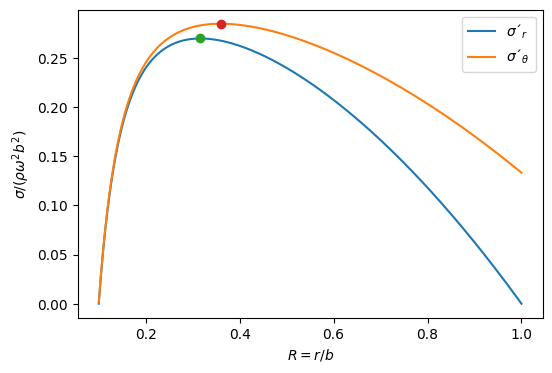

In [19]:
#Plotting the stresses and maximum
plt.figure(figsize=(6,4))
plt.plot(R, sigma_radial_R, label=r'$\sigma´_r$')
plt.plot(R, sigma_hoop_R, label=r'$\sigma´_\theta$')
plt.plot(index_max_radial,max_radial, 'o')
plt.plot(index_max_hoop,max_hoop, 'o')
plt.xlabel(r'$R=r/b$')
plt.ylabel(r'$\sigma/(\rho\omega^2 b^2)$')
plt.legend()
#plt.grid(True)
plt.savefig('stress.jpg')

Problem 3

In [20]:
'''Problem 3'''

import statistics

#initial data
data = np.array([8821, 9276, 9946, 10592])
#revised data
new_data = np.array([8821, 9276, 9946, 10592, 8967])

In [21]:
#equation for safe life
def safe_life(data):
    n=np.size(data)
    res = statistics.geometric_mean(data)/(2.449*(6**(1.645/(6*np.sqrt(n)))))
    return res

In [22]:
safe_life(data)

3077.6263729597613

In [23]:
safe_life(new_data)

3113.376882704013

In [24]:
np.mean(data)

9658.75

In [25]:
np.mean(new_data)

9520.4

________________________________________________________________________________________________________
________________________________________________________________________________________________________
PROBLEM SET 4
________________________________________________________________________________________________________
________________________________________________________________________________________________________

Problem 3

i)

In [2]:
#importing the results obtained from thermocalc for the Ni-Al-Ta
df_ta_01 = pd.read_excel('Q3_results01.xls')
df_ta = f.rename_alloy_columns(df_ta_01, f.names)/100

In [3]:
df_ta = f.calculations(df_ta)
df_ta

,Mole percent Ni,Mole percent Al,Mole percent Ta,Mole percent of Ni in ETA,Mole percent of Al in ETA,Mole percent of Ta in ETA,Ni_gamma,Al_gamma,Ta_gamma,Ni_gammaprime,Al_gammaprime,Ta_gammaprime,Mole percent of Ni in NI3NB,Mole percent of Al in NI3NB,Mole percent of Ta in NI3NB,a_gamma,a_gammaprime,delta
0,0.803959,0.176041,2.000000e-02,NaN,NaN,NaN,0.863297,0.131738,4.964565e-03,0.784180,0.190808,2.501181e-02,NaN,NaN,NaN,3.550056,3.570506,0.005744
1,0.811163,0.158837,3.000000e-02,NaN,NaN,NaN,0.872103,0.115646,1.225156e-02,0.790850,0.173234,3.591615e-02,NaN,NaN,NaN,3.552277,3.575958,0.006644
2,0.816316,0.143684,4.000000e-02,NaN,NaN,NaN,0.878934,0.097880,2.318661e-02,0.795443,0.158952,4.560446e-02,NaN,NaN,NaN,3.556751,3.580802,0.006739
3,0.819001,0.130999,5.000000e-02,NaN,NaN,NaN,0.882644,0.080857,3.649902e-02,0.797786,0.147714,5.450033e-02,NaN,NaN,NaN,3.563023,3.585250,0.006219
4,0.819378,0.120622,6.000000e-02,NaN,NaN,NaN,0.883021,0.066091,5.088825e-02,0.798163,0.138800,6.303725e-02,NaN,NaN,NaN,3.570452,3.589519,0.005326
5,0.817829,0.112171,7.000000e-02,NaN,NaN,NaN,0.880348,0.054118,6.553437e-02,0.796990,0.131521,7.148854e-02,NaN,NaN,NaN,3.578561,3.593744,0.004234
6,0.814782,0.105218,8.000000e-02,NaN,NaN,NaN,0.875133,0.044833,8.003370e-02,0.794665,0.125347,7.998877e-02,NaN,NaN,NaN,3.587049,3.597994,0.003047
7,0.811562,0.100517,8.792103e-02,NaN,NaN,NaN,0.869572,0.039123,9.130465e-02,0.792225,0.120982,8.679316e-02,NaN,NaN,NaN,3.593916,3.601397,0.002079
8,0.811562,0.100517,8.792103e-02,0.792165,0.094716,0.113119,0.869572,0.039123,9.130465e-02,0.792225,0.120982,8.679316e-02,NaN,NaN,NaN,3.593916,3.601397,0.002079
9,0.811557,0.098443,9.000000e-02,0.792165,0.094716,0.113119,0.869572,0.039123,9.130465e-02,0.792225,0.120982,8.679316e-02,NaN,NaN,NaN,3.593916,3.601397,0.002079


In [4]:
res_ta = df_ta[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()

In [5]:
res_ta

,Ni_gamma,Al_gamma,Ta_gamma,Ni_gammaprime,Al_gammaprime,Ta_gammaprime,a_gamma,a_gammaprime,delta
0,0.863297,0.131738,4.964565e-03,0.784180,0.190808,2.501181e-02,3.550056,3.570506,0.005744
1,0.872103,0.115646,1.225156e-02,0.790850,0.173234,3.591615e-02,3.552277,3.575958,0.006644
2,0.878934,0.097880,2.318661e-02,0.795443,0.158952,4.560446e-02,3.556751,3.580802,0.006739
3,0.882644,0.080857,3.649902e-02,0.797786,0.147714,5.450033e-02,3.563023,3.585250,0.006219
4,0.883021,0.066091,5.088825e-02,0.798163,0.138800,6.303725e-02,3.570452,3.589519,0.005326
5,0.880348,0.054118,6.553437e-02,0.796990,0.131521,7.148854e-02,3.578561,3.593744,0.004234
6,0.875133,0.044833,8.003370e-02,0.794665,0.125347,7.998877e-02,3.587049,3.597994,0.003047
7,0.869572,0.039123,9.130465e-02,0.792225,0.120982,8.679316e-02,3.593916,3.601397,0.002079
8,0.869572,0.039123,9.130465e-02,0.792225,0.120982,8.679316e-02,3.593916,3.601397,0.002079
9,0.869572,0.039123,9.130465e-02,0.792225,0.120982,8.679316e-02,3.593916,3.601397,0.002079


In [6]:
f.save_latex(res_ta)

'\\begin{tabular}{rrrrrrrrr}\n\\toprule\nNi_gamma & Al_gamma & Ta_gamma & Ni_gammaprime & Al_gammaprime & Ta_gammaprime & a_gamma & a_gammaprime & delta \\\\\n\\midrule\n0.8633 & 0.1317 & 0.0050 & 0.7842 & 0.1908 & 0.0250 & 3.5501 & 3.5705 & 0.0057 \\\\\n0.8721 & 0.1156 & 0.0123 & 0.7909 & 0.1732 & 0.0359 & 3.5523 & 3.5760 & 0.0066 \\\\\n0.8789 & 0.0979 & 0.0232 & 0.7954 & 0.1590 & 0.0456 & 3.5568 & 3.5808 & 0.0067 \\\\\n0.8826 & 0.0809 & 0.0365 & 0.7978 & 0.1477 & 0.0545 & 3.5630 & 3.5853 & 0.0062 \\\\\n0.8830 & 0.0661 & 0.0509 & 0.7982 & 0.1388 & 0.0630 & 3.5705 & 3.5895 & 0.0053 \\\\\n0.8803 & 0.0541 & 0.0655 & 0.7970 & 0.1315 & 0.0715 & 3.5786 & 3.5937 & 0.0042 \\\\\n0.8751 & 0.0448 & 0.0800 & 0.7947 & 0.1253 & 0.0800 & 3.5870 & 3.5980 & 0.0030 \\\\\n0.8696 & 0.0391 & 0.0913 & 0.7922 & 0.1210 & 0.0868 & 3.5939 & 3.6014 & 0.0021 \\\\\n0.8696 & 0.0391 & 0.0913 & 0.7922 & 0.1210 & 0.0868 & 3.5939 & 3.6014 & 0.0021 \\\\\n0.8696 & 0.0391 & 0.0913 & 0.7922 & 0.1210 & 0.0868 & 3.5939 & 3.

ii)

In [7]:
#importing the data for the molar fraction of the systems to analyze (Ni-Al-Ta-X), where X is Cr, Mo, Re and W
df_cr_01 = pd.read_excel('Q3_results03_Cr.xls')
df_cr = f.rename_alloy_columns(df_cr_01, f.names)/100
df_mo_01 = pd.read_excel('Q3_results03_mo.xls')
df_mo = f.rename_alloy_columns(df_mo_01, f.names)/100
df_re_01 = pd.read_excel('Q3_results03_re.xls')
df_re = f.rename_alloy_columns(df_re_01, f.names)/100
df_w_01 = pd.read_excel('Q3_results03_w.xls')
df_w = f.rename_alloy_columns(df_w_01, f.names)/100

In [8]:
#calculating a_gamma, a_gammaprime and delta
df_cr = f.calculations(df_cr)
df_mo = f.calculations(df_mo)
df_re = f.calculations(df_re)
df_w = f.calculations(df_w)

In [9]:
res_cr = df_cr[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Cr_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'Cr_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()
res_mo = df_mo[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Mo_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'Mo_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()
res_re = df_re[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'Re_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'Re_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()
res_w = df_w[['Ni_gamma', 'Al_gamma', 'Ta_gamma', 'W_gamma', 'Ni_gammaprime', 'Al_gammaprime', 'Ta_gammaprime', 'W_gammaprime', 'a_gamma', 'a_gammaprime', 'delta']].dropna()

In [10]:
res_cr

,Ni_gamma,Al_gamma,Ta_gamma,Cr_gamma,Ni_gammaprime,Al_gammaprime,Ta_gammaprime,Cr_gammaprime,a_gamma,a_gammaprime,delta
0,0.871954,0.115568,0.012253,2.250386e-04,0.790801,0.173221,0.035920,5.829106e-05,3.552288,3.575960,0.006642
1,0.868798,0.114326,0.012111,4.765372e-03,0.789710,0.173245,0.035810,1.234282e-03,3.552466,3.575900,0.006575
2,0.865571,0.113078,0.011970,9.380657e-03,0.788605,0.173262,0.035703,2.429663e-03,3.552652,3.575842,0.006506
3,0.862273,0.111827,0.011830,1.407030e-02,0.787485,0.173273,0.035598,3.644325e-03,3.552846,3.575785,0.006436
4,0.858900,0.110575,0.011691,1.883376e-02,0.786350,0.173276,0.035496,4.877983e-03,3.553048,3.575728,0.006363
5,0.855452,0.109325,0.011553,2.367050e-02,0.785200,0.173273,0.035397,6.130165e-03,3.553260,3.575674,0.006288
6,0.851926,0.108079,0.011415,2.858006e-02,0.784035,0.173264,0.035300,7.400212e-03,3.553480,3.575620,0.006211
7,0.848320,0.106841,0.011277,3.356200e-02,0.782855,0.173251,0.035207,8.687273e-03,3.553710,3.575569,0.006132
8,0.844632,0.105612,0.011140,3.861592e-02,0.781659,0.173232,0.035118,9.990306e-03,3.553950,3.575519,0.006051
9,0.840861,0.104396,0.011002,4.374140e-02,0.780449,0.173211,0.035032,1.130807e-02,3.554200,3.575471,0.005967


In [11]:
f.save_latex(res_cr)

'\\begin{tabular}{rrrrrrrrrrr}\n\\toprule\nNi_gamma & Al_gamma & Ta_gamma & Cr_gamma & Ni_gammaprime & Al_gammaprime & Ta_gammaprime & Cr_gammaprime & a_gamma & a_gammaprime & delta \\\\\n\\midrule\n0.8720 & 0.1156 & 0.0123 & 0.0002 & 0.7908 & 0.1732 & 0.0359 & 0.0001 & 3.5523 & 3.5760 & 0.0066 \\\\\n0.8688 & 0.1143 & 0.0121 & 0.0048 & 0.7897 & 0.1732 & 0.0358 & 0.0012 & 3.5525 & 3.5759 & 0.0066 \\\\\n0.8656 & 0.1131 & 0.0120 & 0.0094 & 0.7886 & 0.1733 & 0.0357 & 0.0024 & 3.5527 & 3.5758 & 0.0065 \\\\\n0.8623 & 0.1118 & 0.0118 & 0.0141 & 0.7875 & 0.1733 & 0.0356 & 0.0036 & 3.5528 & 3.5758 & 0.0064 \\\\\n0.8589 & 0.1106 & 0.0117 & 0.0188 & 0.7864 & 0.1733 & 0.0355 & 0.0049 & 3.5530 & 3.5757 & 0.0064 \\\\\n0.8555 & 0.1093 & 0.0116 & 0.0237 & 0.7852 & 0.1733 & 0.0354 & 0.0061 & 3.5533 & 3.5757 & 0.0063 \\\\\n0.8519 & 0.1081 & 0.0114 & 0.0286 & 0.7840 & 0.1733 & 0.0353 & 0.0074 & 3.5535 & 3.5756 & 0.0062 \\\\\n0.8483 & 0.1068 & 0.0113 & 0.0336 & 0.7829 & 0.1733 & 0.0352 & 0.0087 & 3.5537 &

In [12]:
#finding the minimum value of delta for each dataframe
def min_vals(df):
    min_val = df.loc[df['delta'] == df['delta'].min()]
    return min_val

In [13]:
min_ta = min_vals(df_ta)
min_cr = min_vals(res_cr)
min_mo = min_vals(res_mo)
min_re = min_vals(res_re)
min_w = min_vals(res_w)
df_mins = pd.concat([min_cr,min_mo,min_re,min_w], ignore_index=True)

In [14]:
#ordering cols
cols = ['a_gamma', 'a_gammaprime', 'delta']
order = [c for c in df_mins.columns if c not in cols] + cols
df_mins = df_mins[order]
df_mins

,Ni_gamma,Al_gamma,Ta_gamma,Cr_gamma,Ni_gammaprime,Al_gammaprime,Ta_gammaprime,Cr_gammaprime,Mo_gamma,Mo_gammaprime,Re_gamma,Re_gammaprime,W_gamma,W_gammaprime,a_gamma,a_gammaprime,delta
0,0.743426,0.086190,0.007657,0.162727,0.752833,0.174057,0.034695,0.038415,NaN,NaN,NaN,NaN,NaN,NaN,3.561688,3.575194,0.003785
1,0.843017,0.084321,0.019623,NaN,0.773081,0.164148,0.030745,NaN,0.053038,0.032025,NaN,NaN,NaN,NaN,3.577182,3.573373,0.001066
2,0.830255,0.115670,0.008739,NaN,0.779018,0.179833,0.033973,NaN,NaN,NaN,0.045336,0.007175,NaN,NaN,3.569816,3.576867,0.001973
3,0.871067,0.079716,0.019924,NaN,0.787149,0.158800,0.030000,NaN,NaN,NaN,NaN,NaN,0.029293,0.024051,3.564222,3.577666,0.003765


In [15]:
#finding the min missfit value from all the different alloys
min_alloy = df_mins.loc[df_mins['delta'] == df_mins['delta'].min()]
min_alloy

,Ni_gamma,Al_gamma,Ta_gamma,Cr_gamma,Ni_gammaprime,Al_gammaprime,Ta_gammaprime,Cr_gammaprime,Mo_gamma,Mo_gammaprime,Re_gamma,Re_gammaprime,W_gamma,W_gammaprime,a_gamma,a_gammaprime,delta
1,0.843017,0.084321,0.019623,NaN,0.773081,0.164148,0.030745,NaN,0.053038,0.032025,NaN,NaN,NaN,NaN,3.577182,3.573373,0.001066


In [16]:
#min_ta

In [17]:
f.save_latex(min_w)

'\\begin{tabular}{rrrrrrrrrrr}\n\\toprule\nNi_gamma & Al_gamma & Ta_gamma & W_gamma & Ni_gammaprime & Al_gammaprime & Ta_gammaprime & W_gammaprime & a_gamma & a_gammaprime & delta \\\\\n\\midrule\n0.8711 & 0.0797 & 0.0199 & 0.0293 & 0.7871 & 0.1588 & 0.0300 & 0.0241 & 3.5642 & 3.5777 & 0.0038 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [18]:
f.save_latex(min_alloy)

'\\begin{tabular}{rrrrrrrrrrrrrrrrr}\n\\toprule\nNi_gamma & Al_gamma & Ta_gamma & Cr_gamma & Ni_gammaprime & Al_gammaprime & Ta_gammaprime & Cr_gammaprime & Mo_gamma & Mo_gammaprime & Re_gamma & Re_gammaprime & W_gamma & W_gammaprime & a_gamma & a_gammaprime & delta \\\\\n\\midrule\n0.8430 & 0.0843 & 0.0196 & NaN & 0.7731 & 0.1641 & 0.0307 & NaN & 0.0530 & 0.0320 & NaN & NaN & NaN & NaN & 3.5772 & 3.5734 & 0.0011 \\\\\n\\bottomrule\n\\end{tabular}\n'

Problem 5

In [19]:
#importing the data of the phases compositions
df5_1_01 = pd.read_excel('Q5_results.xls')
df5_01 = f.rename_alloy_columns(df5_1_01, f.names)/100

In [20]:
#to calculate a_gamma, a_gammaprime and delta
df5_01 = f.calculations(df5_01)
df5_01

,Mole percent Ni,Mole percent Al,Mole percent Ta,Mole percent Cr,Mole percent W,Mole percent Re,Mole percent Co,Ni_gamma,Al_gamma,Ta_gamma,...,Mole percent of Ni in LIQUID,Mole percent of Al in LIQUID,Mole percent of Ta in LIQUID,Mole percent of Cr in LIQUID,Mole percent of W in LIQUID,Mole percent of Re in LIQUID,Mole percent of Co in LIQUID,a_gamma,a_gammaprime,delta
0,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.594301,0.125600,0.002055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.579499,3.573888,0.001569
1,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.595595,0.126843,0.002164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.579485,3.573926,0.001554
2,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.596860,0.128086,0.002278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.579478,3.573966,0.001541
3,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.598095,0.129328,0.002397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.579477,3.574008,0.001529
4,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.599302,0.130571,0.002520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.579481,3.574052,0.001518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.568561,0.105402,0.000785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.580523,3.573462,0.001974
106,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.566560,0.104093,0.000731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.580638,3.573443,0.002012
107,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.564501,0.102774,0.000680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.580760,3.573425,0.002051
108,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.562380,0.101444,0.000631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.580889,3.573407,0.002091


In [21]:
#importing the data of the mole fractions of the elements in the alloys
df5_1_02 = pd.read_excel('Q5_results01.xls')
df5_02 = f.rename_alloy_columns(df5_1_02, f.frac_names)
df5_02[['x_Ni','x_Al', 'x_Ta', 'x_Cr', 'x_W', 'x_Re', 'x_Co']] = df5_02[['x_Ni','x_Al', 'x_Ta', 'x_Cr', 'x_W', 'x_Re', 'x_Co']]/100
df5_02

,x_Ni,x_Al,x_Ta,x_Cr,x_W,x_Re,x_Co,x_gamma,x_gammaprime,Mole fraction of LIQUID
0,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.226529,0.773471,NaN
1,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.229440,0.770560,NaN
2,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.232522,0.767478,NaN
3,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.235782,0.764218,NaN
4,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.239229,0.760771,NaN
...,...,...,...,...,...,...,...,...,...,...
105,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.197572,0.802428,NaN
106,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.196578,0.803422,NaN
107,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.195651,0.804349,NaN
108,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.194787,0.805213,NaN


In [22]:
#joining the two dataframes to perform the density calculation 
df5 = pd.concat([df5_01,df5_02], axis=1)
df5 = df5[['x_Ni','x_Al','x_Ta','x_Cr','x_W','x_Re','x_Co','x_gamma','x_gammaprime','a_gamma', 'a_gammaprime','delta']].dropna()
df5

,x_Ni,x_Al,x_Ta,x_Cr,x_W,x_Re,x_Co,x_gamma,x_gammaprime,a_gamma,a_gammaprime,delta
0,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.226529,0.773471,3.579499,3.573888,0.001569
1,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.229440,0.770560,3.579485,3.573926,0.001554
2,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.232522,0.767478,3.579478,3.573966,0.001541
3,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.235782,0.764218,3.579477,3.574008,0.001529
4,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.239229,0.760771,3.579481,3.574052,0.001518
...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.197572,0.802428,3.580523,3.573462,0.001974
106,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.196578,0.803422,3.580638,3.573443,0.002012
107,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.195651,0.804349,3.580760,3.573425,0.002051
108,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.194787,0.805213,3.580889,3.573407,0.002091


In [23]:
#calculating the density
df5['density'] = df5.apply(lambda row: f.density(row, f.molar_masses), axis=1)
df5


,x_Ni,x_Al,x_Ta,x_Cr,x_W,x_Re,x_Co,x_gamma,x_gammaprime,a_gamma,a_gammaprime,delta,density
0,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.226529,0.773471,3.579499,3.573888,0.001569,8.286657
1,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.229440,0.770560,3.579485,3.573926,0.001554,8.286361
2,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.232522,0.767478,3.579478,3.573966,0.001541,8.286041
3,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.235782,0.764218,3.579477,3.574008,0.001529,8.285696
4,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.239229,0.760771,3.579481,3.574052,0.001518,8.285325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.197572,0.802428,3.580523,3.573462,0.001974,8.288755
106,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.196578,0.803422,3.580638,3.573443,0.002012,8.288749
107,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.195651,0.804349,3.580760,3.573425,0.002051,8.288730
108,0.6356,0.18,0.0224,0.002,0.005,0.005,0.15,0.194787,0.805213,3.580889,3.573407,0.002091,8.288697


In [24]:
#average of density
df5['density'].mean()

8.62606242009066

In [25]:
#min value of density
df5['density'].min()

8.237624898425667

In [26]:
f.save_latex(df5)

'\\begin{tabular}{rrrrrrrrrrrrr}\n\\toprule\nx_Ni & x_Al & x_Ta & x_Cr & x_W & x_Re & x_Co & x_gamma & x_gammaprime & a_gamma & a_gammaprime & delta & density \\\\\n\\midrule\n0.6356 & 0.1800 & 0.0224 & 0.0020 & 0.0050 & 0.0050 & 0.1500 & 0.2265 & 0.7735 & 3.5795 & 3.5739 & 0.0016 & 8.2867 \\\\\n0.6356 & 0.1800 & 0.0224 & 0.0020 & 0.0050 & 0.0050 & 0.1500 & 0.2294 & 0.7706 & 3.5795 & 3.5739 & 0.0016 & 8.2864 \\\\\n0.6356 & 0.1800 & 0.0224 & 0.0020 & 0.0050 & 0.0050 & 0.1500 & 0.2325 & 0.7675 & 3.5795 & 3.5740 & 0.0015 & 8.2860 \\\\\n0.6356 & 0.1800 & 0.0224 & 0.0020 & 0.0050 & 0.0050 & 0.1500 & 0.2358 & 0.7642 & 3.5795 & 3.5740 & 0.0015 & 8.2857 \\\\\n0.6356 & 0.1800 & 0.0224 & 0.0020 & 0.0050 & 0.0050 & 0.1500 & 0.2392 & 0.7608 & 3.5795 & 3.5741 & 0.0015 & 8.2853 \\\\\n0.6356 & 0.1800 & 0.0224 & 0.0020 & 0.0050 & 0.0050 & 0.1500 & 0.2429 & 0.7571 & 3.5795 & 3.5741 & 0.0015 & 8.2849 \\\\\n0.6356 & 0.1800 & 0.0224 & 0.0020 & 0.0050 & 0.0050 & 0.1500 & 0.2467 & 0.7533 & 3.5795 & 3.5741 &